# Pré-Processamento dos Dados

Campeonatos Brasileiros: 2025, 2024, 2023 e 2022

Remoção de colunas, adição de features e análise dos dados

## Carregamento dos Dados

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('campeonatos/matches_2025.csv', encoding='latin1')
df2 = pd.read_csv('campeonatos/matches_2024.csv', encoding='latin1')
df3 = pd.read_csv('campeonatos/matches_2023.csv', encoding='latin1')
df4 = pd.read_csv('campeonatos/matches_2022.csv', encoding='latin1')
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [117]:
# Ordenação por data dos jogos
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

## Removendo Colunas Inutilizadas

In [118]:
df = df.drop(columns=['Week', 'Fouls_H', 'Fouls_A', 'Crosses_H',
           'Crosses_A', 'Touches_H', 'Touches_A', 'Tackles_H', 'Tackles_A', 'Interceptions_H', 'Interceptions_A', 'Aerials_H', 'Aerial_A',
           'Clearances_H', 'Clearances_A', 'Offsides_H', 'Offsides_A', 'Goal_Kicks_H', 'Goal_Kicks_A', 'Throw_Ins_H', 'Throw_Ins_A',
           'Long_Balls_H', 'Long_Balls_A', 'Referee', 'Venue', 'Attendance'])

## Visualização Inicial

In [54]:
df.head(5)

,Day,Date,Time,Home,xG_H,Score,xG_A,Away,Possession_H,Possession_A,...,ShotsTarget_H,ShotsTotal_H,ShotsTarget_A,ShotsTotal_A,SaveCompleted_H,SaveTotal_H,SaveCompleted_A,SaveTotal_A,Corners_H,Corners_A
1095,Sat,2022-04-09,21:00,Palmeiras,2.5,23,1.5,Ceará,56%,44%,...,3,16,8,19,6,8,2,3,11,8
1087,Sat,2022-04-09,16:30,Fluminense,1.6,00,0.1,Santos,65%,35%,...,6,26,1,3,1,1,6,6,8,1
1088,Sat,2022-04-09,19:00,Atl Goianiense,1.4,11,1.2,Flamengo,44%,56%,...,3,10,3,12,2,3,2,3,4,10
1093,Sun,2022-04-10,19:00,São Paulo,1.6,40,0.3,Ath Paranaense,55%,45%,...,8,18,0,7,0,0,4,8,5,5
1092,Sun,2022-04-10,18:00,Fortaleza,1.4,01,0.4,Cuiabá,65%,35%,...,5,22,4,9,3,4,5,5,7,1


In [55]:
df.shape

(1467, 24)

In [56]:
df['Home'].value_counts()

,count
Home,
Palmeiras,74
São Paulo,74
Fortaleza,74
Internacional,74
Flamengo,74
RB Bragantino,73
Botafogo (RJ),73
Fluminense,73
Corinthians,73


In [57]:
df['Away'].value_counts()

,count
Away,
Fluminense,74
Corinthians,74
RB Bragantino,74
Atlético Mineiro,74
Botafogo (RJ),74
São Paulo,73
Internacional,73
Flamengo,72
Palmeiras,72


In [58]:
df.describe()

,Date,xG_H,xG_A,PassCompleted_H,PassTotal_H,PassCompleted_A,PassTotal_A,ShotsTarget_H,ShotsTotal_H,ShotsTarget_A,ShotsTotal_A,SaveCompleted_H,SaveTotal_H,SaveCompleted_A,SaveTotal_A,Corners_H,Corners_A
count,1467,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,2024-01-16 17:54:50.797546240,1.426789,1.026926,381.483299,474.780504,362.728016,454.377641,4.790729,15.003408,3.698023,11.460804,2.802318,3.698023,3.541241,4.790729,5.868439,4.561691
min,2022-04-09 00:00:00,0.100000,0.000000,119.000000,201.000000,115.000000,199.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-11-09 00:00:00,0.900000,0.600000,302.000000,394.500000,286.000000,374.000000,3.000000,11.000000,2.000000,8.000000,1.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,2023-11-29 00:00:00,1.300000,0.900000,373.000000,469.000000,354.000000,447.000000,5.000000,14.000000,3.000000,11.000000,3.000000,3.000000,3.000000,5.000000,5.000000,4.000000
75%,2024-11-22 12:00:00,1.800000,1.400000,458.500000,553.000000,429.000000,522.000000,6.000000,18.000000,5.000000,14.000000,4.000000,5.000000,5.000000,6.000000,7.000000,6.000000
max,2025-11-09 00:00:00,5.300000,3.800000,744.000000,809.000000,828.000000,901.000000,17.000000,37.000000,18.000000,31.000000,12.000000,18.000000,13.000000,17.000000,19.000000,17.000000
std,NaN,0.731263,0.612638,108.789383,110.346630,107.421904,107.254243,2.386689,5.231150,2.130341,4.653953,1.828729,2.130341,2.099869,2.386689,3.034096,2.637898


In [59]:
df.dtypes

,0
Day,object
Date,datetime64[ns]
Time,object
Home,object
xG_H,float64
Score,object
xG_A,float64
Away,object
Possession_H,object
Possession_A,object


In [60]:
missing_values = df.isnull().sum()
missing_values

,0
Day,0
Date,0
Time,0
Home,0
xG_H,0
Score,0
xG_A,0
Away,0
Possession_H,0
Possession_A,0


In [61]:
df['Time'].value_counts()

,count
Time,
16:00,315
18:30,255
19:00,197
20:00,142
21:30,124
21:00,102
20:30,53
18:00,52
16:30,50


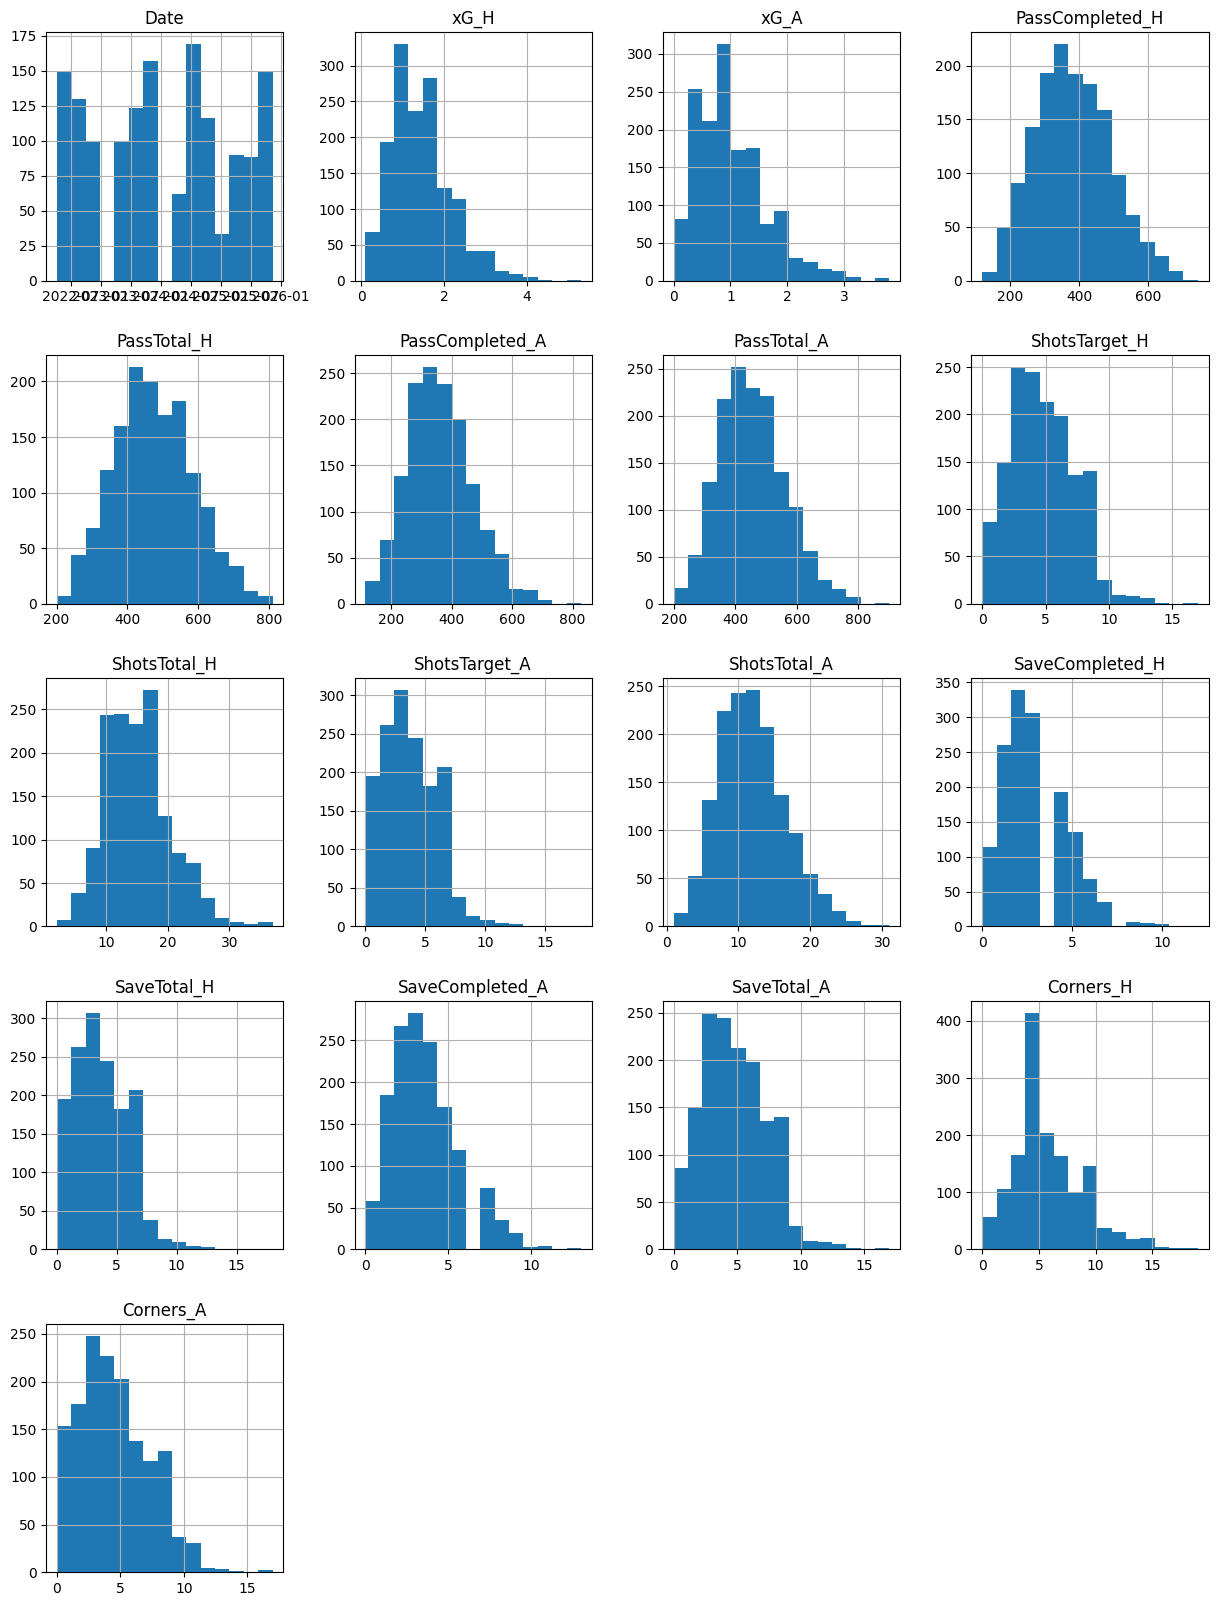

In [62]:
df.hist(figsize=(15,20),bins = 15)
plt.title("Features Distribution")
plt.show()

## Criação e Correção de Colunas

In [119]:
# Conversão String -> float
df["Possession_H"] = df["Possession_H"].str.rstrip("%").astype(float) / 100
df["Possession_A"] = df["Possession_A"].str.rstrip("%").astype(float) / 100

In [120]:
scores = [result.split('\x96') for result in df['Score']]
df['Score'] = scores

# Gols dos times na partida do registro
df['Score_gols_H'] = df['Score'].apply(lambda x: int(x[0]))
df['Conceding_gols_H'] = df['Score'].apply(lambda x: int(x[1]))
df['Score_gols_A'] = df['Score'].apply(lambda x: int(x[1]))
df['Conceding_gols_A'] = df['Score'].apply(lambda x: int(x[0]))

df['Result'] = df['Score'].apply(
    lambda x: 'W' if int(x[0]) > int(x[1])
    else 'D' if int(x[0]) == int(x[1])
    else 'L'
)

df['Result'].value_counts()/len(df)

,count
Result,
W,0.468984
D,0.267894
L,0.263122


Observe que temos uma classe muito dominante. Nos testes, podemos esperar, para o caso de 3 labels, que a label dominante tenha um desempenho superior às outras labels. Além dos testes com 3 labels, também faremos testes com 2 labels (vitória do time da casa e não vitória do time da casa), buscando equilibrar as classes

In [121]:
# Criação de Médias Móveis para os times da casa e de fora
# Time da casa => Média Móvel para os jogos em casa (somente)
# Time de Fora => Média Móvel para os jogos fora (somente)

games_sequence = 5
rolling_features = ['Score_gols_H', 'Score_gols_A', 'Conceding_gols_H', 'Conceding_gols_A', 'xG_H', 'xG_A', 'ShotsTotal_H', 'ShotsTotal_A', 'ShotsTarget_H', 'ShotsTarget_A', 'Possession_H', 'Possession_A', 'PassTotal_H',
'PassTotal_A', 'SaveTotal_H', 'SaveTotal_A', 'SaveCompleted_H', 'SaveCompleted_A', 'Corners_H', 'Corners_A']

for feature in rolling_features:
  df['Average_' + feature] = df[feature].mean()

for idx, row in df.iterrows():
  home_club = row['Home']
  away_club = row['Away']

  for i in range(0, len(rolling_features), 2):
    home_df_past = df[(df['Home'] == home_club) & (df['Date'] < row['Date'])]
    away_df_past = df[(df['Away'] == away_club) & (df['Date'] < row['Date'])]

    if(len(home_df_past) >= games_sequence and len(away_df_past) >= games_sequence):
      home_mean = home_df_past[rolling_features[i]].iloc[-games_sequence:].mean()
      away_mean = away_df_past[rolling_features[i+1]].iloc[-games_sequence:].mean()

      df.loc[idx, 'Average_' + rolling_features[i]] = home_mean
      df.loc[idx, 'Average_' + rolling_features[i+1]] = away_mean

In [122]:
# Criação de Médias Móveis Globais
# Time da Casa => Média móvel dos últimos X jogos (tanto em casa quanto fora)
# Time de Fora => Média móvel dos últimos X jogos (tanto em casa quanto fora)

cols_stats = ['Score_gols', 'Conceding_gols', 'xG', 'ShotsTotal', 'ShotsTarget', 'Possession']

# Obtém as partidas de cada time em casa e fora
home_stats = df[['Date', 'Home'] + [c + '_H' for c in cols_stats]].copy()
home_stats.columns = ['Date', 'Team'] + cols_stats

away_stats = df[['Date', 'Away'] + [c + '_A' for c in cols_stats]].copy()
away_stats.columns = ['Date', 'Team'] + cols_stats

general_stats = pd.concat([home_stats, away_stats]).sort_values(by=['Team', 'Date'])

# Calcular as Médias Móveis Gerais (Últimos 5 jogos)
rolling_general = general_stats.groupby('Team')[cols_stats].transform(
    lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()
)

# Renomear as colunas para indicar que são médias gerais
rolling_general.columns = ['General_Avg_' + c for c in cols_stats]

# Juntar de volta as datas e times para fazer o merge
general_stats = pd.concat([general_stats[['Date', 'Team']], rolling_general], axis=1)

df = df.merge(general_stats,
              left_on=['Date', 'Home'],
              right_on=['Date', 'Team'],
              how='left').drop(columns=['Team'])
df = df.rename(columns={f'General_Avg_{c}': f'Home_General_Avg_{c}' for c in cols_stats})

df = df.merge(general_stats,
              left_on=['Date', 'Away'],
              right_on=['Date', 'Team'],
              how='left').drop(columns=['Team'])
df = df.rename(columns={f'General_Avg_{c}': f'Away_General_Avg_{c}' for c in cols_stats})

# Completar valores nulos
df['Home_General_Avg_Score_gols'] = df['Home_General_Avg_Score_gols'].fillna(2)
df['Home_General_Avg_Conceding_gols'] = df['Home_General_Avg_Conceding_gols'].fillna(1)
df['Home_General_Avg_xG'] = df['Home_General_Avg_xG'].fillna(1.25)
df['Home_General_Avg_ShotsTotal'] = df['Home_General_Avg_ShotsTotal'].fillna(14)
df['Home_General_Avg_ShotsTarget'] = df['Home_General_Avg_ShotsTarget'].fillna(4)
df['Home_General_Avg_Possession'] = df['Home_General_Avg_Possession'].fillna(0.5)

df['Away_General_Avg_Score_gols'] = df['Away_General_Avg_Score_gols'].fillna(1)
df['Away_General_Avg_Conceding_gols'] = df['Away_General_Avg_Conceding_gols'].fillna(2)
df['Away_General_Avg_xG'] = df['Away_General_Avg_xG'].fillna(1.20)
df['Away_General_Avg_ShotsTotal'] = df['Away_General_Avg_ShotsTotal'].fillna(12)
df['Away_General_Avg_ShotsTarget'] = df['Away_General_Avg_ShotsTarget'].fillna(3)
df['Away_General_Avg_Possession'] = df['Away_General_Avg_Possession'].fillna(0.5)

In [123]:
# Calcula quantos pontos os times fizeram nas últimas partidas

def get_points(result, is_home):
    if result == 'D':
        return 1
    if result == 'W' and is_home:
        return 3
    if result == 'L' and not is_home:
        return 3
    return 0

home_df = df[['Date', 'Home', 'Result']].copy()
home_df.columns = ['Date', 'Team', 'Result']
home_df['Is_Home'] = True

away_df = df[['Date', 'Away', 'Result']].copy()
away_df.columns = ['Date', 'Team', 'Result']
away_df['Is_Home'] = False

team_stats = pd.concat([home_df, away_df]).sort_values(by=['Team', 'Date'])

team_stats['Points_Game'] = team_stats.apply(
    lambda x: get_points(x['Result'], x['Is_Home']), axis=1
)

# Forma recente dos últimos 5 jogos dos times
team_stats['Recent_Form'] = team_stats.groupby('Team')['Points_Game']\
                                      .transform(lambda x: x.rolling(window=5, min_periods=1).sum().shift())

team_stats['Recent_Form'] = team_stats['Recent_Form'].fillna(5)

# Merge Mandante
df = df.merge(team_stats[['Date', 'Team', 'Recent_Form']],
              left_on=['Date', 'Home'],
              right_on=['Date', 'Team'],
              how='left')
df = df.rename(columns={'Recent_Form': 'Home_Recent_Form'}).drop(columns=['Team'])

# Merge Visitante
df = df.merge(team_stats[['Date', 'Team', 'Recent_Form']],
              left_on=['Date', 'Away'],
              right_on=['Date', 'Team'],
              how='left')
df = df.rename(columns={'Recent_Form': 'Away_Recent_Form'}).drop(columns=['Team'])

df['Form_Diff'] = df['Home_Recent_Form'] - df['Away_Recent_Form']

# Verificar o resultado
print(df[['Date', 'Home', 'Away', 'Home_Recent_Form', 'Away_Recent_Form', 'Form_Diff']].tail())

           Date         Home        Away  Home_Recent_Form  Away_Recent_Form  \
1462 2025-11-09  Corinthians       Ceará               9.0               4.0   
1463 2025-11-09     Flamengo      Santos              10.0               5.0   
1464 2025-11-09    Fortaleza      Grêmio               5.0               6.0   
1465 2025-11-09     Mirassol   Palmeiras              10.0              10.0   
1466 2025-11-09     Cruzeiro  Fluminense              11.0               9.0   

      Form_Diff  
1462        5.0  
1463        5.0  
1464       -1.0  
1465        0.0  
1466        2.0  


In [124]:
# One hot encoding para Day
df['Match_Day'] = df['Day'].apply(
    lambda x: 'Weekend' if x in ('Sat', 'Sun')
    else 'Weekday'
)

df = df.drop(columns='Match_Day')

In [ ]:
# One hot enconding para time da casa e de fora
# Dá para testar depois com a seguinte ideia: one hot encoding com apenas uma coluna: +1 para o time da casa , -1 para o visitante
# 0 para o restante

#df = pd.get_dummies(df, columns = ['Home', 'Away'])

In [125]:
# Pega apenas a parte das horas do horário
def fix_time(time):
  hour = time.split(':')[0]
  return hour

df['Hour'] = df['Time'].apply(fix_time)

df['Match_Period'] = df['Hour'].apply(
    lambda x: 'Morning' if(int(x) > 6 and int(x) < 13)
    else 'Afternoon' if(int(x) > 13 and int(x) < 18)
    else 'Evening'
)

# Faz one-hot encoding para o período do jogo
df = pd.get_dummies(df, columns=['Match_Period'])

In [84]:
df.head()

,Day,Date,Time,Home,xG_H,Score,xG_A,Away,Possession_H,Possession_A,...,Away_General_Avg_ShotsTotal,Away_General_Avg_ShotsTarget,Away_General_Avg_Possession,Home_Recent_Form,Away_Recent_Form,Form_Diff,Hour,Match_Period_Afternoon,Match_Period_Evening,Match_Period_Morning
0,Sat,2022-04-09,21:00,Palmeiras,2.5,"[2, 3]",1.5,Ceará,0.56,0.44,...,12.0,3.0,0.5,5.0,5.0,0.0,21,False,True,False
1,Sat,2022-04-09,16:30,Fluminense,1.6,"[0, 0]",0.1,Santos,0.65,0.35,...,12.0,3.0,0.5,5.0,5.0,0.0,16,True,False,False
2,Sat,2022-04-09,19:00,Atl Goianiense,1.4,"[1, 1]",1.2,Flamengo,0.44,0.56,...,12.0,3.0,0.5,5.0,5.0,0.0,19,False,True,False
3,Sun,2022-04-10,19:00,São Paulo,1.6,"[4, 0]",0.3,Ath Paranaense,0.55,0.45,...,12.0,3.0,0.5,5.0,5.0,0.0,19,False,True,False
4,Sun,2022-04-10,18:00,Fortaleza,1.4,"[0, 1]",0.4,Cuiabá,0.65,0.35,...,12.0,3.0,0.5,5.0,5.0,0.0,18,False,True,False


# Aplicação dos Modelos

Utilizamos 4 modelos de predição: XGBoost, RandomForest, Regressão Logística e KNN

In [126]:
# Cria os conjuntos de predição e de labels

columns = df.columns
idx = columns.get_loc("Result")
df_after_Result = df.iloc[:, idx+1:]

predict = df.iloc[:, idx+1:]
predict = predict.drop(columns=['Hour', 'Average_PassTotal_A'])
label = df['Result']

predict

,Average_Score_gols_H,Average_Score_gols_A,Average_Conceding_gols_H,Average_Conceding_gols_A,Average_xG_H,Average_xG_A,Average_ShotsTotal_H,Average_ShotsTotal_A,Average_ShotsTarget_H,Average_ShotsTarget_A,...,Away_General_Avg_xG,Away_General_Avg_ShotsTotal,Away_General_Avg_ShotsTarget,Away_General_Avg_Possession,Home_Recent_Form,Away_Recent_Form,Form_Diff,Match_Period_Afternoon,Match_Period_Evening,Match_Period_Morning
0,1.421268,1.012952,1.012952,1.421268,1.426789,1.026926,15.003408,11.460804,4.790729,3.698023,...,1.20,12.0,3.0,0.500,5.0,5.0,0.0,False,True,False
1,1.421268,1.012952,1.012952,1.421268,1.426789,1.026926,15.003408,11.460804,4.790729,3.698023,...,1.20,12.0,3.0,0.500,5.0,5.0,0.0,True,False,False
2,1.421268,1.012952,1.012952,1.421268,1.426789,1.026926,15.003408,11.460804,4.790729,3.698023,...,1.20,12.0,3.0,0.500,5.0,5.0,0.0,False,True,False
3,1.421268,1.012952,1.012952,1.421268,1.426789,1.026926,15.003408,11.460804,4.790729,3.698023,...,1.20,12.0,3.0,0.500,5.0,5.0,0.0,False,True,False
4,1.421268,1.012952,1.012952,1.421268,1.426789,1.026926,15.003408,11.460804,4.790729,3.698023,...,1.20,12.0,3.0,0.500,5.0,5.0,0.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1.600000,0.400000,0.600000,0.800000,1.740000,0.820000,11.600000,11.400000,2.200000,4.600000,...,0.96,14.0,3.2,0.494,9.0,4.0,5.0,True,False,False
1463,1.600000,1.000000,0.800000,2.000000,1.800000,1.200000,16.200000,12.600000,4.600000,4.800000,...,1.18,12.6,4.0,0.538,10.0,5.0,5.0,False,True,False
1464,0.800000,0.800000,0.800000,2.000000,1.200000,0.640000,16.800000,8.400000,4.800000,1.800000,...,1.68,16.0,4.4,0.458,5.0,6.0,-1.0,False,True,False
1465,1.800000,1.600000,0.600000,1.400000,1.680000,1.220000,12.400000,15.400000,4.800000,6.000000,...,1.64,20.8,8.6,0.540,10.0,10.0,0.0,False,True,False


In [86]:
label

,Result
0,L
1,D
2,D
3,W
4,L
...,...
1462,L
1463,W
1464,D
1465,W


In [127]:
# 2 Labels

label2 = label.copy()

label2 = label2.apply(
    lambda x: 'N' if(x == 'L' or x == 'D')
    else 'W'
)

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predict, label, test_size=0.2, shuffle=False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(predict, label2, test_size=0.2, shuffle=False)

In [129]:
## RandomForest - 3 Labels

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitagem com séries temporais (5 folds)
tscv = TimeSeriesSplit(n_splits=5)

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=1)

# Otimização para determinar melhores parâmetros
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy'
)

# Treina com os melhores parâmetros
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

print("Melhores parâmetros:", random_search.best_params_)
print("Melhor score:", random_search.best_score_)

y_pred = random_search.predict(X_test)
print("Acurácia no Teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Melhores parâmetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 56}
Melhor score: 0.4902564102564103
Acurácia no Teste: 0.5204081632653061

Relatório de Classificação:
               precision    recall  f1-score   support

           D       0.33      0.01      0.03        74
           L       0.53      0.24      0.33        75
           W       0.52      0.92      0.67       145

    accuracy                           0.52       294
   macro avg       0.46      0.39      0.34       294
weighted avg       0.48      0.52      0.42       294


Matriz de Confusão:
 [[  1   7  66]
 [  0  18  57]
 [  2   9 134]]


In [131]:
# Splitagem com séries temporais (5 folds)
tscv = TimeSeriesSplit(n_splits=5)

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=1)

# Otimização para determinar melhores parâmetros
random_search_2 = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy'
)

# Treina com os melhores parâmetros
random_search_2.fit(X_train, y_train2)

best_rf_2 = random_search_2.best_estimator_


print("Melhores parâmetros:", random_search_2.best_params_)
print("Melhor score:", random_search_2.best_score_)

y_pred = random_search_2.predict(X_test)
print("Acurácia no Teste:", accuracy_score(y_test2, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test2, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test2, y_pred))

Melhores parâmetros: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 272}
Melhor score: 0.5948717948717949
Acurácia no Teste: 0.564625850340136

Relatório de Classificação:
               precision    recall  f1-score   support

           N       0.56      0.70      0.62       149
           W       0.58      0.42      0.49       145

    accuracy                           0.56       294
   macro avg       0.57      0.56      0.55       294
weighted avg       0.57      0.56      0.56       294


Matriz de Confusão:
 [[105  44]
 [ 84  61]]


In [95]:
!pip install xgboost
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
## XGBoost

import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

mapa = {'L': 0, 'D': 1, 'W': 2}
y_train_map = y_train.map(mapa)
y_test_map = y_test.map(mapa)

def objective(trial):
    # Espaço de busca sugerido pelo Optuna
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True), # Regularização L1
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True), # Regularização L2
        'n_jobs': -1,
        'random_state': 42
    }

    model = XGBClassifier(**params)

    tscv = TimeSeriesSplit(n_splits=5)

    # Calcula a acurácia média
    scores = cross_val_score(model, X_train, y_train_map, cv=tscv, scoring='accuracy', n_jobs=-1)

    return scores.mean()

# Criar e rodar o estudo
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

print("Melhores parâmetros encontrados:", study.best_params)
print("Melhor acurácia na validação:", study.best_value)

# Treinar o modelo final com os melhores parâmetros
best_params = study.best_params
final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, y_train_map)

y_pred = final_xgb.predict(X_test)
print("Acurácia no Teste:", accuracy_score(y_test_map, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test_map, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test_map, y_pred))

[I 2025-11-23 17:45:44,585] A new study created in memory with name: no-name-d07d9b29-b727-4371-b09a-a71e201efd6a
[I 2025-11-23 17:45:50,706] Trial 0 finished with value: 0.46871794871794875 and parameters: {'n_estimators': 529, 'learning_rate': 0.00763867289776299, 'max_depth': 8, 'subsample': 0.7578681265748386, 'colsample_bytree': 0.9769293957641287, 'min_child_weight': 8, 'reg_alpha': 6.7358398331804015, 'reg_lambda': 0.00014645723616439876}. Best is trial 0 with value: 0.46871794871794875.
[I 2025-11-23 17:45:52,995] Trial 1 finished with value: 0.4461538461538462 and parameters: {'n_estimators': 494, 'learning_rate': 0.026870392333035138, 'max_depth': 3, 'subsample': 0.8100446170762452, 'colsample_bytree': 0.703367930309312, 'min_child_weight': 9, 'reg_alpha': 0.000138608177964982, 'reg_lambda': 0.20426798584419356}. Best is trial 0 with value: 0.46871794871794875.
[I 2025-11-23 17:45:55,706] Trial 2 finished with value: 0.43487179487179484 and parameters: {'n_estimators': 511, '

Melhores parâmetros encontrados: {'n_estimators': 241, 'learning_rate': 0.0050005647271606874, 'max_depth': 7, 'subsample': 0.7975457752995594, 'colsample_bytree': 0.8736583807185578, 'min_child_weight': 6, 'reg_alpha': 1.7896453476358731, 'reg_lambda': 0.004430694524233952}
Melhor acurácia na validação: 0.48410256410256414
Acurácia no Teste: 0.5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.24      0.32        75
           1       0.15      0.03      0.05        74
           2       0.52      0.88      0.65       145

    accuracy                           0.50       294
   macro avg       0.39      0.38      0.34       294
weighted avg       0.42      0.50      0.42       294


Matriz de Confusão:
 [[ 18   2  55]
 [  9   2  63]
 [  9   9 127]]


In [133]:
## XGBoost - 2 Classes

import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

mapa = {'N': 0, 'W': 1}
y_train_map = y_train2.map(mapa)
y_test_map = y_test2.map(mapa)

def objective(trial):
    # Espaço de busca sugerido pelo Optuna
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10, log=True), # Regularização L1
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10, log=True), # Regularização L2
        'n_jobs': -1,
        'random_state': 42
    }

    model = XGBClassifier(**params)

    tscv = TimeSeriesSplit(n_splits=5)

    # Calcula a acurácia média
    scores = cross_val_score(model, X_train, y_train_map, cv=tscv, scoring='accuracy', n_jobs=-1)

    return scores.mean()

# Criar e rodar o estudo
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

print("Melhores parâmetros encontrados:", study.best_params)
print("Melhor acurácia na validação:", study.best_value)

# Treinar o modelo final com os melhores parâmetros
best_params = study.best_params
final_xgb_2 = XGBClassifier(**best_params)
final_xgb_2.fit(X_train, y_train_map)

y_pred = final_xgb_2.predict(X_test)
print("Acurácia no Teste:", accuracy_score(y_test_map, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test_map, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test_map, y_pred))

[I 2025-11-23 17:51:33,883] A new study created in memory with name: no-name-fdcf850f-969f-4952-90c9-77e00932da98
[I 2025-11-23 17:51:34,719] Trial 0 finished with value: 0.5764102564102564 and parameters: {'n_estimators': 136, 'learning_rate': 0.024341011838920474, 'max_depth': 6, 'subsample': 0.7884149030684457, 'colsample_bytree': 0.885544084596245, 'min_child_weight': 6, 'reg_alpha': 0.000693850042872216, 'reg_lambda': 0.8853638377173444}. Best is trial 0 with value: 0.5764102564102564.
[I 2025-11-23 17:51:36,560] Trial 1 finished with value: 0.5569230769230769 and parameters: {'n_estimators': 503, 'learning_rate': 0.15869891992872515, 'max_depth': 5, 'subsample': 0.856542821733832, 'colsample_bytree': 0.7952338597997778, 'min_child_weight': 4, 'reg_alpha': 5.0809752771890796e-05, 'reg_lambda': 8.31948534263575e-05}. Best is trial 0 with value: 0.5764102564102564.
[I 2025-11-23 17:51:38,625] Trial 2 finished with value: 0.5661538461538462 and parameters: {'n_estimators': 548, 'lear

Melhores parâmetros encontrados: {'n_estimators': 418, 'learning_rate': 0.012474860960596626, 'max_depth': 7, 'subsample': 0.6508793786725605, 'colsample_bytree': 0.9940364107998874, 'min_child_weight': 2, 'reg_alpha': 7.774957288800078, 'reg_lambda': 0.0023461573302897185}
Melhor acurácia na validação: 0.6030769230769231
Acurácia no Teste: 0.5782312925170068

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62       149
           1       0.59      0.48      0.53       145

    accuracy                           0.58       294
   macro avg       0.58      0.58      0.57       294
weighted avg       0.58      0.58      0.57       294


Matriz de Confusão:
 [[100  49]
 [ 75  70]]


In [99]:
predict.columns

Index(['Average_Score_gols_H', 'Average_Score_gols_A',
       'Average_Conceding_gols_H', 'Average_Conceding_gols_A', 'Average_xG_H',
       'Average_xG_A', 'Average_ShotsTotal_H', 'Average_ShotsTotal_A',
       'Average_ShotsTarget_H', 'Average_ShotsTarget_A',
       'Average_Possession_H', 'Average_Possession_A', 'Average_PassTotal_H',
       'Average_PassTotal_A', 'Average_SaveTotal_H', 'Average_SaveTotal_A',
       'Average_SaveCompleted_H', 'Average_SaveCompleted_A',
       'Average_Corners_H', 'Average_Corners_A', 'Home_General_Avg_Score_gols',
       'Home_General_Avg_Conceding_gols', 'Home_General_Avg_xG',
       'Home_General_Avg_ShotsTotal', 'Home_General_Avg_ShotsTarget',
       'Home_General_Avg_Possession', 'Away_General_Avg_Score_gols',
       'Away_General_Avg_Conceding_gols', 'Away_General_Avg_xG',
       'Away_General_Avg_ShotsTotal', 'Away_General_Avg_ShotsTarget',
       'Away_General_Avg_Possession', 'Home_Recent_Form', 'Away_Recent_Form',
       'Form_Diff', 'Match

In [134]:
# Salvamento dos dados e modelos para o site (xgboost e randomforest)
import joblib

joblib.dump(random_search, 'randomForest.pkl')
joblib.dump(final_xgb, 'xgBoost.pkl')

home_features = [
    'Home', 'Average_Score_gols_H', 'Average_Conceding_gols_H', 'Average_xG_H', 'Average_ShotsTotal_H', 'Average_ShotsTarget_H',
    'Average_Possession_H', 'Average_PassTotal_H', 'Average_SaveTotal_H',
    'Average_SaveCompleted_H', 'Average_Corners_H', 'Home_General_Avg_Score_gols', 'Home_General_Avg_Conceding_gols',
    'Home_General_Avg_xG', 'Home_General_Avg_ShotsTotal',
    'Home_General_Avg_ShotsTarget', 'Home_General_Avg_Possession',
    'Home_Recent_Form'
]

away_features = [
    'Away', 'Average_Score_gols_A', 'Average_Conceding_gols_A', 'Away_General_Avg_Score_gols', 'Away_General_Avg_Conceding_gols', 'Average_xG_A',
    'Average_ShotsTotal_A', 'Average_ShotsTarget_A',
    'Average_Possession_A', 'Average_SaveTotal_A',
    'Average_SaveCompleted_A', 'Average_Corners_A',
    'Away_General_Avg_xG', 'Away_General_Avg_ShotsTotal',
    'Away_General_Avg_ShotsTarget', 'Away_General_Avg_Possession',
    'Away_Recent_Form'
]

predict['Home'] = df['Home']
predict['Away'] = df['Away']

home_df = pd.DataFrame()
away_df = pd.DataFrame()

for feature in home_features:
  home_df[feature] = predict[feature]

for feature in away_features:
  away_df[feature] = predict[feature]

home_teams = home_df.groupby('Home').last()
away_teams = away_df.groupby('Away').last()

home_teams.to_csv('home_df.csv')
away_teams.to_csv('away_df.csv')

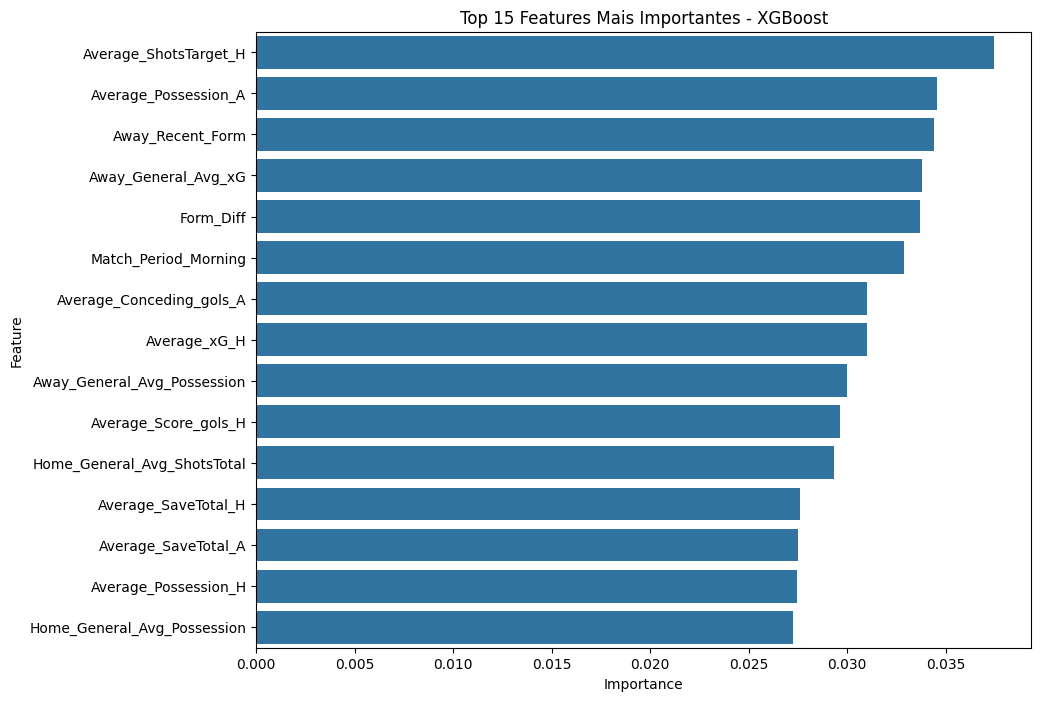

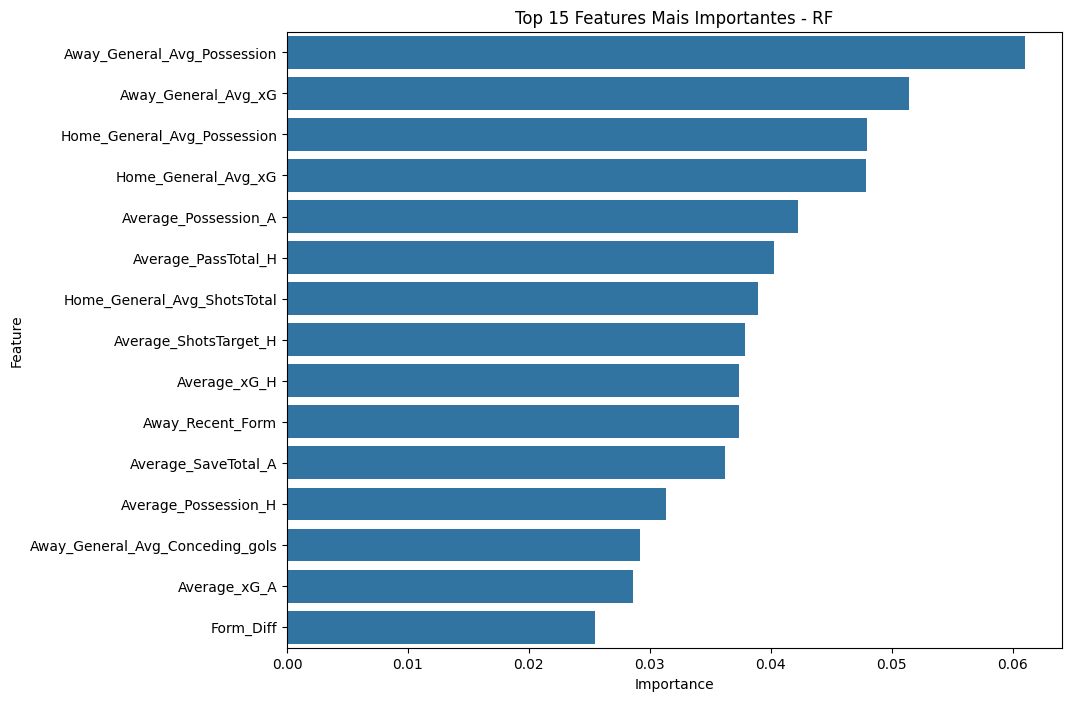

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_xgb.feature_importances_
})

feature_importances2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})

# Ordenar por importância
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances2 = feature_importances2.sort_values(by='Importance', ascending=False)

# Plotar as Top 15
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Features Mais Importantes - XGBoost')
plt.show()

# Plotar as Top 15
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances2.head(15))
plt.title('Top 15 Features Mais Importantes - RF')
plt.show()

In [136]:
feature_importances['Feature'].tolist()

['Average_ShotsTarget_H',
 'Average_Possession_A',
 'Away_Recent_Form',
 'Away_General_Avg_xG',
 'Form_Diff',
 'Match_Period_Morning',
 'Average_Conceding_gols_A',
 'Average_xG_H',
 'Away_General_Avg_Possession',
 'Average_Score_gols_H',
 'Home_General_Avg_ShotsTotal',
 'Average_SaveTotal_H',
 'Average_SaveTotal_A',
 'Average_Possession_H',
 'Home_General_Avg_Possession',
 'Average_Conceding_gols_H',
 'Away_General_Avg_Conceding_gols',
 'Home_General_Avg_xG',
 'Average_Corners_A',
 'Match_Period_Evening',
 'Home_General_Avg_Conceding_gols',
 'Average_PassTotal_H',
 'Average_SaveCompleted_H',
 'Average_ShotsTotal_H',
 'Away_General_Avg_ShotsTotal',
 'Match_Period_Afternoon',
 'Away_General_Avg_ShotsTarget',
 'Away_General_Avg_Score_gols',
 'Average_xG_A',
 'Average_ShotsTotal_A',
 'Average_Corners_H',
 'Home_General_Avg_ShotsTarget',
 'Home_General_Avg_Score_gols',
 'Home_Recent_Form',
 'Average_SaveCompleted_A',
 'Average_Score_gols_A',
 'Average_ShotsTarget_A']

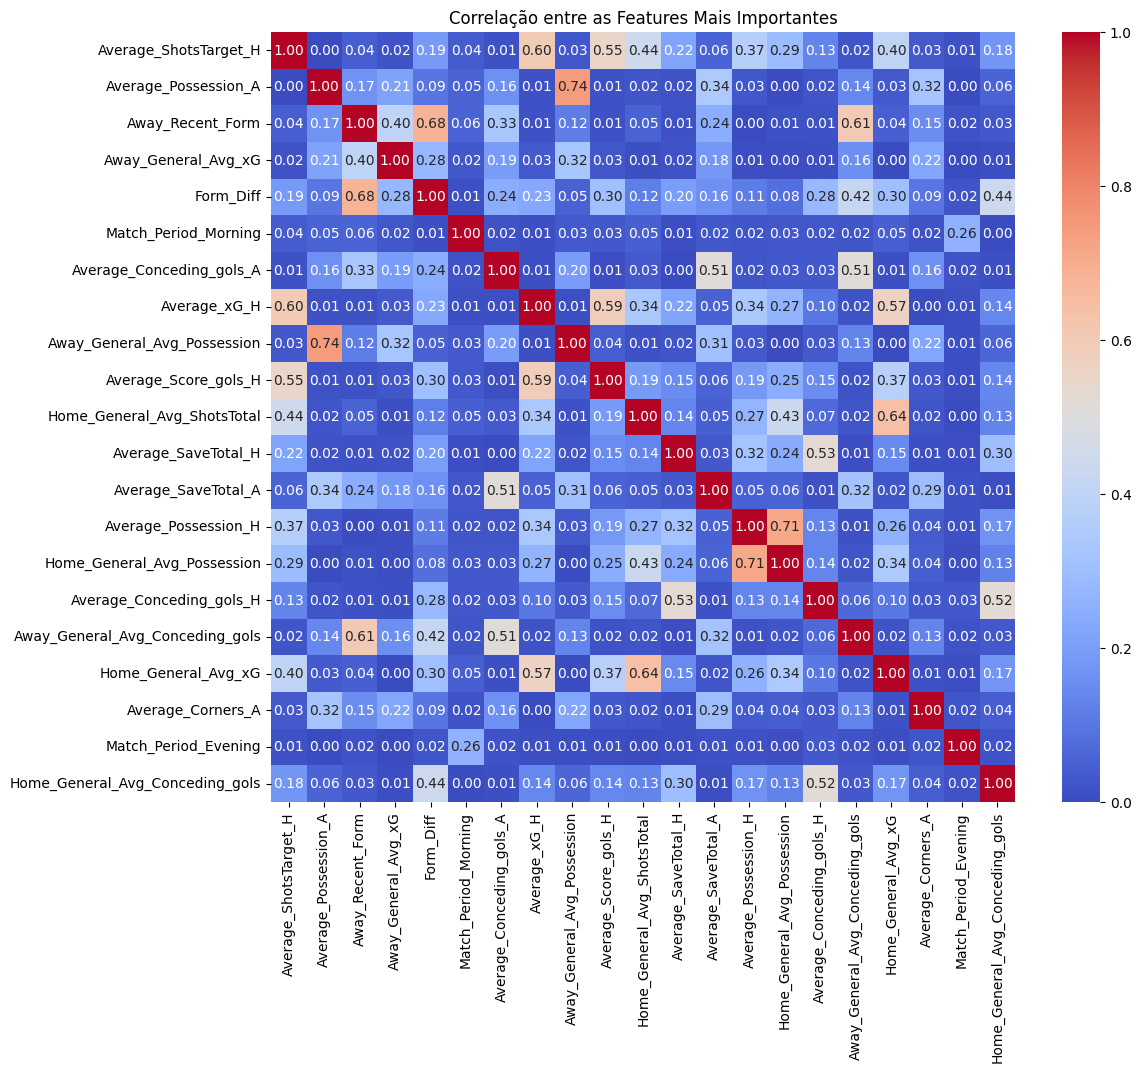

In [137]:
# Matriz de Correlação

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cols_to_check = [
    'Average_ShotsTarget_H',
    'Average_Possession_A',
    'Away_Recent_Form',
    'Away_General_Avg_xG',
    'Form_Diff',
    'Match_Period_Morning',
    'Average_Conceding_gols_A',
    'Average_xG_H',
    'Away_General_Avg_Possession',
    'Average_Score_gols_H',
    'Home_General_Avg_ShotsTotal',
    'Average_SaveTotal_H',
    'Average_SaveTotal_A',
    'Average_Possession_H',
    'Home_General_Avg_Possession',
    'Average_Conceding_gols_H',
    'Away_General_Avg_Conceding_gols',
    'Home_General_Avg_xG',
    'Average_Corners_A',
    'Match_Period_Evening',
    'Home_General_Avg_Conceding_gols',
]

corr_matrix = df[cols_to_check].corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1)
plt.title("Correlação entre as Features Mais Importantes")
plt.show()

## Regressão Logística, KNN

In [139]:
df = df.drop(columns=['Average_PassTotal_A'])

In [140]:
df.columns

Index(['Day', 'Date', 'Time', 'Home', 'xG_H', 'Score', 'xG_A', 'Away',
       'Possession_H', 'Possession_A', 'PassCompleted_H', 'PassTotal_H',
       'PassCompleted_A', 'PassTotal_A', 'ShotsTarget_H', 'ShotsTotal_H',
       'ShotsTarget_A', 'ShotsTotal_A', 'SaveCompleted_H', 'SaveTotal_H',
       'SaveCompleted_A', 'SaveTotal_A', 'Corners_H', 'Corners_A',
       'Score_gols_H', 'Conceding_gols_H', 'Score_gols_A', 'Conceding_gols_A',
       'Result', 'Average_Score_gols_H', 'Average_Score_gols_A',
       'Average_Conceding_gols_H', 'Average_Conceding_gols_A', 'Average_xG_H',
       'Average_xG_A', 'Average_ShotsTotal_H', 'Average_ShotsTotal_A',
       'Average_ShotsTarget_H', 'Average_ShotsTarget_A',
       'Average_Possession_H', 'Average_Possession_A', 'Average_PassTotal_H',
       'Average_SaveTotal_H', 'Average_SaveTotal_A', 'Average_SaveCompleted_H',
       'Average_SaveCompleted_A', 'Average_Corners_H', 'Average_Corners_A',
       'Home_General_Avg_Score_gols', 'Home_General_Avg_

In [141]:
# Normalização dos atributos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['Average_Score_gols_H', 'Average_Score_gols_A',
       'Average_Conceding_gols_H', 'Average_Conceding_gols_A', 'Average_xG_H',
       'Average_xG_A', 'Average_ShotsTotal_H', 'Average_ShotsTotal_A',
       'Average_ShotsTarget_H', 'Average_ShotsTarget_A',
       'Average_Possession_H', 'Average_Possession_A', 'Average_PassTotal_H',
       'Average_SaveTotal_H', 'Average_SaveTotal_A', 'Average_SaveCompleted_H',
       'Average_SaveCompleted_A', 'Average_Corners_H', 'Average_Corners_A',
       'Home_General_Avg_Score_gols', 'Home_General_Avg_Conceding_gols',
       'Home_General_Avg_xG', 'Home_General_Avg_ShotsTotal',
       'Home_General_Avg_ShotsTarget', 'Home_General_Avg_Possession',
       'Away_General_Avg_Score_gols', 'Away_General_Avg_Conceding_gols',
       'Away_General_Avg_xG', 'Away_General_Avg_ShotsTotal',
       'Away_General_Avg_ShotsTarget', 'Away_General_Avg_Possession',
       'Home_Recent_Form', 'Away_Recent_Form']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df["Form_Diff"] = df['Home_Recent_Form'] - df['Away_Recent_Form']

print(df[cols_to_scale].head())

   Average_Score_gols_H  Average_Score_gols_A  Average_Conceding_gols_H  \
0              0.321386              0.389597                  0.389597   
1              0.321386              0.389597                  0.389597   
2              0.321386              0.389597                  0.389597   
3              0.321386              0.389597                  0.389597   
4              0.321386              0.389597                  0.389597   

   Average_Conceding_gols_A  Average_xG_H  Average_xG_A  Average_ShotsTotal_H  \
0                  0.374018      0.396064      0.357047               0.39306   
1                  0.374018      0.396064      0.357047               0.39306   
2                  0.374018      0.396064      0.357047               0.39306   
3                  0.374018      0.396064      0.357047               0.39306   
4                  0.374018      0.396064      0.357047               0.39306   

   Average_ShotsTotal_A  Average_ShotsTarget_H  Average_ShotsT

In [143]:
from sklearn.model_selection import train_test_split

columns = df.columns
idx = columns.get_loc("Result")
df_depois_x = df.iloc[:, idx+1:]

predict = df.iloc[:, idx+1:]
label = df['Result']
predict = predict.drop(columns=['Hour'])

X_train, X_test, y_train, y_test = train_test_split(predict, label, test_size=0.2, shuffle=False)

In [144]:
# 2 Labels

label2 = label.copy()

label2 = label2.apply(
    lambda x: 'N' if(x == 'L' or x == 'D')
    else 'W'
)

X_train, X_test, y_train2, y_test2 = train_test_split(predict, label2, test_size=0.2, shuffle=False)

In [ ]:
## Regressão Logística - 3 Labels

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5102040816326531

Classification Report:
               precision    recall  f1-score   support

           D       0.29      0.05      0.09        74
           L       0.43      0.28      0.34        75
           W       0.54      0.86      0.66       145

    accuracy                           0.51       294
   macro avg       0.42      0.40      0.36       294
weighted avg       0.45      0.51      0.44       294



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Regressão Logística - 2 Labels

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, log_loss

tscv = TimeSeriesSplit(n_splits=5)

lr = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

grid_log = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train, y_train)

print("Melhores Parâmetros:", grid_log.best_params_)
print("Melhor Acurácia (Validação):", grid_log.best_score_)

best_lr = grid_log.best_estimator_
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)

print(f"Acurácia no Teste: {accuracy_score(y_test, y_pred):.4f}")
print(f"Log Loss no Teste: {log_loss(y_test, y_proba):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores Parâmetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
Melhor Acurácia (Validação): 0.47282051282051285
Acurácia no Teste: 0.4966
Log Loss no Teste: 1.0014


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [146]:
# Regressão Logística - 2 Labels

tscv = TimeSeriesSplit(n_splits=5)

lr = LogisticRegression(solver='saga', max_iter=5000, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

grid_log = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train, y_train2)

print("Melhores Parâmetros:", grid_log.best_params_)
print("Melhor Acurácia (Validação):", grid_log.best_score_)

best_lr_2 = grid_log.best_estimator_
y_pred = best_lr_2.predict(X_test)
y_proba = best_lr_2.predict_proba(X_test)

print(f"Acurácia no Teste: {accuracy_score(y_test2, y_pred):.4f}")
print(f"Log Loss no Teste: {log_loss(y_test2, y_proba):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores Parâmetros: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Melhor Acurácia (Validação): 0.6
Acurácia no Teste: 0.5952
Log Loss no Teste: 0.6773


In [148]:
## KNN
from sklearn.neighbors import KNeighborsClassifier

print("3 Labels")

for i in range(2, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy, i)

print("2 Labels")

for i in range(2, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train2)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test2, y_pred)
  print("Accuracy:", accuracy, i)


3 Labels
Accuracy: 0.2925170068027211 2
Accuracy: 0.37755102040816324 3
Accuracy: 0.4217687074829932 4
Accuracy: 0.38095238095238093 5
Accuracy: 0.40476190476190477 6
Accuracy: 0.41156462585034015 7
Accuracy: 0.41496598639455784 8
Accuracy: 0.43537414965986393 9
Accuracy: 0.445578231292517 10
Accuracy: 0.445578231292517 11
Accuracy: 0.4523809523809524 12
Accuracy: 0.43197278911564624 13
Accuracy: 0.4421768707482993 14
Accuracy: 0.4489795918367347 15
Accuracy: 0.45918367346938777 16
Accuracy: 0.4489795918367347 17
Accuracy: 0.45918367346938777 18
Accuracy: 0.4387755102040816 19
Accuracy: 0.43197278911564624 20
Accuracy: 0.4557823129251701 21
Accuracy: 0.46258503401360546 22
Accuracy: 0.46938775510204084 23
Accuracy: 0.47278911564625853 24
Accuracy: 0.47959183673469385 25
Accuracy: 0.48299319727891155 26
Accuracy: 0.48299319727891155 27
Accuracy: 0.48299319727891155 28
Accuracy: 0.47959183673469385 29
Accuracy: 0.47959183673469385 30
Accuracy: 0.48299319727891155 31
Accuracy: 0.462585034

In [149]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy, i)

knn2 = KNeighborsClassifier(n_neighbors=27)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy, i)

Accuracy: 0.5204081632653061 39
Accuracy: 0.48299319727891155 39


In [150]:
joblib.dump(best_lr, 'regressao.pkl')
joblib.dump(knn, 'knn.pkl')

home_df = pd.DataFrame()
away_df = pd.DataFrame()

for feature in home_features:
  home_df[feature] = df[feature]

for feature in away_features:
  away_df[feature] = df[feature]

home_teams = home_df.groupby('Home').last()
away_teams = away_df.groupby('Away').last()

home_teams.to_csv('home_df_minmax.csv')
away_teams.to_csv('away_df_minmax.csv')